Task: [T356765](https://phabricator.wikimedia.org/T356765)

## Overview

::: {.callout-note appearance=simple icon=false}

The [Content Translation tool](https://www.mediawiki.org/wiki/Content_translation) (CX) allows editors to create translations right next to the original article and automates the boring steps such as copying text across browser tabs, looking for corresponding links and categories, etc. The tool has been live on Wikimedia projects for over a decade, and was used to create more than 2 million articles across various language Wikipedias. As it is with every article creation process (created through CX or otherwise), articles get deleted due to various factors, such poor quality of the content, plagiarism, notability, among others. Compared to articles created without using CX, [deletion rate](https://www.mediawiki.org/wiki/Content_translation/Deletion_statistics_comparison) of the articles created using CX is significantly lower. On average, deletion rate of articles[^1] created using CX is ~3%, while that of non-CX article is ~12%.

The quarterly CX deletion stats comparision is used by the Language team to adjust machine translation limits on various Wikipedias to enforce review and modification of initial machine translation before articles are published. The team is working on making [improvements to the limit system](https://phabricator.wikimedia.org/T251887), and the primary goal of this analysis is to inform that work. The analysis will explore the importance and the impact of various factors in influencing the deletion outcome of articles translated through the content translation tool.

:::

[^1]: articles created in the main namespace only.

::: {.callout-warning}

## Note

When refererring to articles throughout the report, unless otherwise mentioned, it's a reference to the translated articles using CX. For example, if it says, percentage of articles deleted, it's referring to percentage of translated articles that were deleted.

:::

### Data

:::{.callout-tip icon=false collapse=false appearance=simple}

For the analysis, two years of data preceeding December 31, 2023 was gathered, which resulted in ~500K observations.[^1] The data gathering and processing steps are not included in this report, please refer to the [data gathering](https://nbviewer.org/urls/gitlab.wikimedia.org/kcvelaga/cx-deletion-rate-factors/-/raw/main/01_data-gathering.ipynb/%3Fref_type%3Dheads) and the [data processing](https://nbviewer.org/urls/gitlab.wikimedia.org/kcvelaga/cx-deletion-rate-factors/-/raw/main/02-data_processing.ipynb/%3Fref_type%3Dheads) notebooks for more information on the queries used and the cleaning steps. Due to the presence of null values, 0.7% of the data collected has been excluded from the analysis. The following table gives an overview the variables considered:

:::

In [4]:
#| column: page

var_info <- read.delim('variable_info.tsv', sep='\t')

var_tbl <- (
    var_info %>%
    gt(groupname_col = 'Type', rowname_col='Variable') %>%
    opt_stylize() %>%
    tab_header('Overview of Variables') %>%
    tab_options(
        table.font.size = px(14)
    ) %>%
    tab_source_note(
        gt::md('data sources documentation: [mediawiki_history](https://wikitech.wikimedia.org/wiki/Analytics/Data_Lake/Edits/MediaWiki_history), \
                [cx_translations](https://www.mediawiki.org/wiki/Extension:ContentTranslation/cx_translations_table), \
                [content_gap_metrics](), \
                [cxserver](https://cxserver.wikimedia.org/v2?doc), \
                [wiki comparision](https://github.com/wikimedia-research/wiki-comparison)')
    )
)

display_html(as_raw_html(var_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 14px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <td colspan="3" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 125%; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center">Overview of Variables 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Description" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left">Description 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Source" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left">Source 
 
 
 
 
 <th colspan="3" class="gt_group_heading" scope="colgroup" id="numeric" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: initial; text-transform: inherit; border-top-style: solid; border-top-width: 2px; border-top-color: #0076BA; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: middle; text-align: left;" bgcolor="#FFFFFF" valign="middle" align="left">numeric 
 
 <th id="stub_1_1" scope="row" class="gt_r

In [5]:
factors_info <- read.delim('factor_vars_info.tsv', sep='\t')

factors_tbl <- (
    factors_info %>%
    gt() %>%
    tab_header('Categories of Categorical Variable') %>%
    opt_stylize()
)

display_html(as_raw_html(factors_tbl))

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'factor_vars_info.tsv'”


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <td colspan="2" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 125%; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center">Categories of Categorical Variable 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Variables" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left">Variables 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Categories" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left">Categories 
 
 
 
 user_edit_bucket 
 1-10, 11-99, 100-999, 1000-49999, 5000+ 
 <td headers="Variables" class="gt_row gt_left gt_striped" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; margin: 10px; border-top-style: none; border-top-width: 1px; border-top-color: #89D3FE; border-left-style: none; border-left-width: 1px; border-left-color: #89D3FE; border-right-style: none; border-right-width: 1px; border-right-color: #89D3FE; vertical-align: middle; overflow-x: hidden; background-color: #F4F4F4; text-align: left;" valign="middle" bgcolor="#F4F4F4" align="left">user_rights_level 
<td headers="Categories" class="gt_row gt_left gt_striped" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; margin: 10px; border-top-style: none; border-top-width: 1px; border-top-color: #89D3FE; border-left-style: none; border-left-width: 1px; border-left-color: #89D3FE; border-right-style: none; border-right-width: 1px; border-right-color: #89D3FE; vertical-align: middle; overflow-x: hidden; background-color: #F4F4F4; text-align: left;" valign="middle" bgcolor="#F4F4F4" align="left">none, confirmed, extended 
 source_wp_rank_bin 
 1-5, 6-10, 11-20, 21-50, 51-max 
 <td headers="Variables" class="gt_row gt_left gt_stri

:::{.callout-note icon=false collapse=false appearance=simple}

## Standard quality criteria

The data for variables about quality (whether the source and the target article meet the standard quaity criteria) was sourced from [Content Gap metrics](https://meta.wikimedia.org/wiki/Research:Knowledge_Gaps_Index/Measurement/Content#Metrics_for_Aggregation). An article is standard quality if it meets at least 5 of the 6 following criteria:

* at least 8kB long in size
* has at least one category
* has at least seven sections
* is illustrated with at least one image
* has at least four references
* has at least two intra-wiki links

:::

### Methods

:::{.callout-tip icon=false collapse=false appearance=simple}

As the goal of the analysis is to understand the importance and the influence of various variables in influencing the deletion outcome of a translated article. After initial data exploration, the following methods have been chosen.

**Random forests for variable importance** 

[Random forest](https://en.wikipedia.org/wiki/Random_forest) is a classification algorithm, which can also be used to understand [variable importance](https://en.wikipedia.org/wiki/Random_forest#Variable_importance) in a dataset. To understand the variable importance, we will be using the permutation importance approach which gives the Mean Decrease in Accuracy (MDA). In this approach, values of a given variable get randomly permutted to see how that affects classification accuracy. The use of the approach has been inspired from: @popov_2016.

**Hiearchial logistic regression to estimate probability of deletion**

During the initial data exploration, class imbalance was observed in the data. The incidence of outcome (i.e. `is_page_deleted`) is not consistent across Wikipedias (the target article's language), and there is variation based on Wikipedia's comparative size. Even though there has been extensive use of CX on smaller Wikipedias, the deletion rate had been substantially lower. For example, on Wikipedias smaller than the top 50, only ~1.6% of 145K articles were deleted, compared to ~7.4% of 97K articles on top 11 to 20 wikis. The low incidence might be due to factors beyond variables available and likely due to reasons such as lower patrolling, deletion activity and also variation in baseline expectation of translation activity, which are beyond the quality of a translation. 

A hiearchial logistic regression model (also known as [mixed effects model](https://en.wikipedia.org/wiki/Mixed_model)) will be helpful to deal with class imbalance across the groups (in this case, target Wikipedia size bin). It helps us to understand the variation in baseline probability for each grouped bin of the target language Wikipedia.

----

In both the steps, a seperate analysis has been done for articles created by first-time editors i.e. the published translation was their first edit on the project. This is because, several variables such as number of articles created during a given preceeding time frame, time since previous edit etc. are not relevant for first-time editors.

:::

## Setup

In [1]:
supressWarnings <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
supressWarnings({
    library(tidyverse);
    library(glue);
    library(gt);
    library(DescTools);
    library(caret);
    library(tictoc);
    library(ranger);
    library(broom);
    library(lme4);
    library(modelsummary);
    library(RhpcBLASctl);
    library(IRdisplay);
    library(scales);
    library(htmltools);
    library(gridExtra);
    library(grid);
    library(gtsummary);
    library(arm)
}) 

# seems like one of later packages (probabily arm) is masking dplyr's select function
select <- dplyr::select

blas_set_num_threads(1)
options(
    digits = 3, 
    scipen = 50, 
    repr.plot.width = 15, 
    repr.plot.height = 10
)

# random seed for reproducible results
set.seed(2024)

In [2]:
cx_base <- readRDS('secrets/cx_data.rds')
cx <- cx_base

In [7]:
# display great tables horizontally
display_tbl_hrz <- function(tables, space = 10) {
    
    tables_html <- lapply(tables, function(tbl) {
        div(style = sprintf("margin-right: %spx;", space),
            HTML(as.character(as.tags(tbl))))
    })
    
    main_div <- div(style = "display: flex; justify-content: space-around; flex-wrap: wrap;", tables_html)
    return(main_div)
}

# format big numbers
format_big_number <- function(num) {
  if (num < 1000) {
    return(as.character(num))
  } else if (num < 1000000) {
    return(paste(format(num / 1000, nsmall = 1), "K", sep = ""))
  } else if (num < 1000000000) {
    return(paste(format(num / 1000000, nsmall = 1), "M", sep = ""))
  } else {
    return(paste(format(num / 1000000000, nsmall = 1), "B", sep = ""))
  }
}

# calculate percentage difference
pct_diff <- function(old, new) {
    return(((new - old) / old) * 100)
}

## Data preparation

### Winsorizing
    
The numerical variables in the dataset can have extreme values (outliers), which can impact the analysis (for example, during modelling). [Winsorizing](https://en.wikipedia.org/wiki/Winsorizing) will help us limit extreme values, without any significant impact on the rest of the distribution. So instead of completely eliminating an outlier, it will be capped at certain threshold (for example: 95th percentile). The values can be winsorized at different levels: 10%, 5%, 1%.^[10% winsoring would mean capping the top 5% of the values at value of the 95th percentiles and bottom 5% of the values at the value of the 5th percentile] After exploring the quantiles of the variables, the percentage of winsorization will be decided.

In [8]:
num_cols <- c(
    'source_bytes', 'target_bytes', 'secs_since_prev_edit',
    'mt_pct', 'human_pct', 'duration_mins', 
    'creations_1hr', 'creations_6hr', 'creations_24hr', 'creations_72hr',
    'creations_7days', 'creations_15days', 'creations_30days'
)

In [9]:
pre_winsz_quantiles <- data.frame(matrix(ncol=6))
quantile_names <- names(quantile(NULL))
colnames(pre_winsz_quantiles) <- c(c('Variable'), quantile_names)

for (col in num_cols) {
    col_quantiles <- quantile(cx_base[[col]])
    pre_winsz_quantiles <- rbind(pre_winsz_quantiles, c(col, col_quantiles[1], col_quantiles[2], col_quantiles[3], col_quantiles[4], col_quantiles[5]))
}

pre_winsz_quantiles <- na.omit(pre_winsz_quantiles)

In [10]:
#| tbl-cap-location: margin

pre_winsz_tbl <- (
    pre_winsz_quantiles %>%
    mutate(across(quantile_names, ~ as.numeric(as.character(.)))) %>%
    gt() %>%
    tab_header(
        'Quantiles of Numeric Variables',
        '(pre-winsorizing)'
    ) %>%
    fmt_number(
        columns = quantile_names, decimals=0
    ) %>% 
    tab_footnote(
        '- 50% indicates the mean (average) value.'
    ) %>% 
    tab_footnote(
        '- 100% indicates the most extreme value for the variable.'
    )
)

display_html(as_raw_html(pre_winsz_tbl))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(quantile_names, ~as.numeric(as.character(.)))`.
Caused by warning:
! Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(quantile_names)

  # Now:
  data %>% select(all_of(quantile_names))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Quantiles of Numeric Variables 
 
 
 <td colspan="6" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; font-weight: normal;" bgcolor="#FFFFFF" align="center">(pre-winsorizing) 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Variable" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left">Variable 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="0%" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">0% 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="25%" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">25% 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="50%" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" vali

:::{.callout-note collapse=false icon=false appearance=simple}

* Given the above table, winsorizing will be done as following:
    + 10%: `secs_since_prev_edit`
    + 5%: `duration_mins`
    + 1%: `source_bytes` and `target_types`
* Although creations during a given preceeding time frame has extreme values, winsorizing won't be performed on those columns. The reason being, as one of the goals of the analysis is to find whether high creation rate (during campaigns) will lead to lower quality translations, leading to more deletions, limiting extremes for these columns will mask that information.

:::

In [11]:
winsz_10pct =  c(0.05, 0.95)
winsz_5pct = c(0.025, 0.975)
winsz_1pct = c(0.01, 0.99)

col_winsz_levels <- c(
    'source_bytes' = '1pct', 
    'target_bytes' = '1pct',
    'secs_since_prev_edit' = '10pct', 
    'duration_mins' = '5pct'
)

for (col in num_cols) {
    if (!is.na(col_winsz_levels[col])) {
        if (col_winsz_levels[col] == '10pct') {
            cx[[col]] = Winsorize(cx[[col]], probs = winsz_10pct)
        } else if (col_winsz_levels[col] == '5pct') {
            cx[[col]] = Winsorize(cx[[col]], probs = winsz_5pct)
        } else if (col_winsz_levels[col] == '1pct') {
            cx[[col]] = Winsorize(cx[[col]], probs = winsz_1pct)
        }
    }     
}

In [12]:
post_winsz_quantiles <- data.frame(matrix(ncol=6))
colnames(post_winsz_quantiles) <- c(c('Variable'), quantile_names)

for (col in num_cols) {
    col_quantiles <- quantile(cx[[col]])
    post_winsz_quantiles <- rbind(post_winsz_quantiles, c(col, col_quantiles[1], col_quantiles[2], col_quantiles[3], col_quantiles[4], col_quantiles[5]))
}

post_winsz_quantiles <- na.omit(post_winsz_quantiles)

In [147]:
select_cols <- c('Variable', '50%', '100%')
pre_winsz_set <- pre_winsz_quantiles[select_cols]
post_winsz_set <- post_winsz_quantiles[select_cols]

colnames(pre_winsz_set)[2:3] <- c('pre50', 'pre100')
colnames(post_winsz_set)[2:3] <- c('post50', 'post100')

pre_post_quantiles <- merge(pre_winsz_set, post_winsz_set, by = 'Variable')
rownames(pre_post_quantiles) <- pre_post_quantiles$Variable

pre_post_quantiles_tbl <- (
    pre_post_quantiles[names(col_winsz_levels), ] %>%
    mutate(across(c('pre50', 'pre100', 'post50', 'post100'), ~ as.numeric(as.character(.)))) %>%
    arrange(factor(Variable, levels=num_cols)) %>%
    gt() %>%
    fmt_number(
        c('pre50', 'pre100', 'post50', 'post100'), decimals=0
    ) %>%
    tab_spanner(
        'Mean (Average)', columns = c('pre50', 'post50')
    ) %>%
    tab_spanner(
        '100%', columns = c('pre100', 'post100')
    ) %>%
    cols_label(
        pre50 = 'Pre',
        pre100 = 'Pre',
        post50 = 'Post',
        post100 = 'Post'
    ) %>%
    tab_header(
        'Variation in Quantiles Pre/Post Winsorizing'
    ) %>% 
    tab_footnote(
        '- 100% indicates the most extreme value for the variable.'
    )
)

:::{.callout-note collapse=false icon=false appearance=simple}

Please refer to @tbl-pre-post-winsz in the appendix to check how the extreme values changed pre and post winsorizing.

:::

## Exploratory data analysis

Let us do a simple exploratory data analysis of how each variable varies by the deletion outcome, and to get basic understanding of the data.

* For numeric variables: average values by deletion outcome
    * for example: average target_bytes of articles deteted vs. not deleted.
* For logical (True/False) variables: proportion by deletion outcome
    * for example: percentage of transated articles deleted if the source article met the standard quality criteria or not.
* For categorical variables: deletion proportion by each category
    * for example: percentage of articles by various edit buckets, that were deleted. 

### Numerical variables

In [14]:
mean_by_del_status <- data.frame(t(
    cx %>%
    filter(is_first_edit == FALSE) %>%
    select(is_page_deleted, all_of(num_cols)) %>%
    group_by(is_page_deleted) %>%
    summarize(across(all_of(num_cols), mean))
))

colnames(mean_by_del_status) <- c('No', 'Yes')
mean_by_del_status$Variable <- rownames(mean_by_del_status)
rownames(mean_by_del_status) <- NULL

mean_by_del_status_tbl <- (
    mean_by_del_status[-1, ] %>%
    gt() %>%
    cols_move_to_start('Yes') %>%
    cols_move_to_start('Variable') %>%
    tab_spanner('Is Page Deleted', c('Yes', 'No')) %>%
    tab_header(
        'Average of Numeric Features by Page Deletion Status',
        'Non-Newcomers'
    ) %>%
    fmt_number(c('Yes', 'No'), decimals=0) %>%
    opt_stylize(style = 5)
)

In [148]:
edit1_num_cols = c('source_bytes', 'target_bytes', 'mt_pct', 'human_pct', 'duration_mins')

mean_by_del_status_edit1 <- data.frame(t(
    cx %>%
    filter(is_first_edit == TRUE) %>%
    select(is_page_deleted, all_of(edit1_num_cols)) %>%
    group_by(is_page_deleted) %>%
    summarize(across(all_of(edit1_num_cols), mean))
))

colnames(mean_by_del_status_edit1) <- c('No', 'Yes')
mean_by_del_status_edit1$Variable <- rownames(mean_by_del_status_edit1)
rownames(mean_by_del_status_edit1) <- NULL

mean_by_del_status_edit1_tbl <- (
    mean_by_del_status_edit1[-1, ] %>%
    gt() %>%
    cols_move_to_start('Yes') %>%
    cols_move_to_start('Variable') %>%
    tab_spanner('Is Page Deleted', c('Yes', 'No')) %>%
    tab_header(
        'Average of Numerical Variables by Page Deletion Status',
        'First-time editors'
    ) %>%
    fmt_number(c('Yes', 'No'), decimals=0) %>%
    opt_stylize(style = 5) %>%
    tab_source_note('Other columns are not applicable for users making their first edit.')
)

In [16]:
#| column: page

num_cols_mean_by_edit_bucket <- (
    cx %>% 
    filter(!is_first_edit) %>%
    group_by(user_edit_bucket, is_page_deleted) %>%
    summarise(across(c(source_bytes, target_bytes, secs_since_prev_edit, mt_pct, human_pct, duration_mins), mean), .groups = 'drop')
)

num_cols_mean_by_edit_bucket$is_page_deleted[num_cols_mean_by_edit_bucket$is_page_deleted == TRUE] <- 'Deleted'
num_cols_mean_by_edit_bucket$is_page_deleted[num_cols_mean_by_edit_bucket$is_page_deleted == FALSE] <- 'Not Deleted'


num_cols_mean_by_edit_bucket_tbl <- (
    num_cols_mean_by_edit_bucket %>%
    gt(rowname_col = 'is_page_deleted', groupname_col = 'user_edit_bucket') %>% 
    opt_stylize() %>%
    opt_row_striping() %>%
    tab_header('Average of Numerical Features by Edit Buckets')
)

display_tbl_hrz(list(as_raw_html(mean_by_del_status_tbl), as_raw_html(mean_by_del_status_edit1_tbl)), space = 0)

Shiny tags cannot be represented in plain text (need html)

:::{.callout-note collapse=false}

## Summary

* **source_bytes** & **target_bytes**: On average, for articles that were not deleted, the size of the source article at the time of initating the translation was lower, and the size of the target article at the time publication was higher. This indicates that attempts to translate longer articles might increase the chances of deletion, whereas publishing longer translations would decrease the chances of deletion. This mostly holds true across all the user experience levels (edit buckets).
* **mt_pct** & **human_pct**: The current understanding is that higher proportion of machine translated content in the final publication might result in a bad quality translation (and thereby higher chance of deletion). Contrary to that, on average, for articles that were not deleted, the proportion of machine translation was higher and the proportion of human modification was lower. This indicates that human modification might not necessarily increase the translation quality. This holds true across all the user experience levels (edit buckets).
* **duration_mins**: On average, for articles that were not deleted, the time spent translating the article was longer. However it is not consistent across user experience levels.
* **time_since_prev_edit**: On average, for articles that were not deleted, time since the user's previour edit was shorter. However, in the case of users with 11-99 edits or 5000+ edits, when a page was not deleted, the time since user's previous edit was longer.
* ***creations_* during a given preceeding time frame**: Across all the time frames, for articles that were deleted, users had created more number of articles (with a substantial difference). This indicates creating too many articles within a short timeframe (for example during campaigns) might lead increase in the chances of deletion.

----

* For breakdown of average values by user edit bucket, please refer to @tbl-num-features-avg-by-edit-bucket in the appendix section.

:::

### Logical variables

In [17]:
calc_proportion <- function (col, df = cx, is_col_bool = TRUE) {
    result <- (
        df %>%
        group_by(.data[[col]]) %>%
        summarise(
            Total = n(),
            del = sum(is_page_deleted),
            not_del = sum(!is_page_deleted)
        ) %>%
        mutate(
            pct_del = del / Total,
            pct_not_del = not_del / Total,
            Variable = col,
            Total_fmt = sapply(Total, format_big_number)
        ) %>%
        select(-c(del, not_del))
    )

    if (is_col_bool) {
        colnames(result)[1] <- 'TF'
    
        result <- (
            result %>% 
            mutate(
                across('TF', str_replace, 'TRUE', 'Yes'),
                across('TF', str_replace, 'FALSE', 'No')
            )
        )
    }

    return(data.frame(result))
}

In [18]:
logical_cols <- c('is_source_std_quality', 'is_target_std_quality', 'is_source_human',
                  'is_mt_available', 'is_first_edit', 'is_mobile_edit')

logical_cols_proportion_list <- list()
for (col in logical_cols) {
    logical_cols_proportion_list[[col]] <- calc_proportion(col, cx)
}

logical_cols_proportion <- do.call(rbind, logical_cols_proportion_list)

logical_cols_proportion_tbl <- (
    logical_cols_proportion %>%
    mutate(Total = sapply(Total, format_big_number)) %>%
    gt(
        groupname_col = 'Variable', 
        rowname_col = 'TF'
    ) %>%
    fmt_percent(
        c('pct_del', 'pct_not_del'), 
        decimals=0
    ) %>%
    data_color(
        c('pct_del', 'pct_not_del'),
        palette = 'GnBu'
    ) %>%
    tab_spanner(
        'Is Page Deleted', 
        c('pct_del', 'pct_not_del')
    ) %>%
    cols_label(
        pct_del = 'Deleted',
        pct_not_del = 'No'
    ) %>%
    cols_hide('Total_fmt') %>%
    tab_header('Deletion Proportion for Logical Variables') %>%
    opt_stylize(5)
)

display_html(as_raw_html(logical_cols_proportion_tbl))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across("TF", str_replace, "TRUE", "Yes")`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 3px; border-top-color: #D5D5D5; border-right-style: solid; border-right-width: 3px; border-right-color: #D5D5D5; border-bottom-style: solid; border-bottom-width: 3px; border-bottom-color: #D5D5D5; border-left-style: solid; border-left-width: 3px; border-left-color: #D5D5D5;" bgcolor="#FFFFFF">
 
 
 <td colspan="4" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 125%; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D5D5D5; font-weight: normal;" bgcolor="#FFFFFF" align="center">Deletion Proportion for Logical Variables 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="2" colspan="1" scope="col" id style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#004D80" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="2" colspan="1" scope="col" id="Total" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#004D80" valign="bottom" align="left">Total 
 
 Is Page Deleted 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Deleted" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#004D80" valign="bottom" align="right">Deleted 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="No" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#004D80" valign="bottom" align="right">No 
 
 
 
 
 <th colspan="4" class="gt_group_heading

:::{.callout-note collapse=false}
## Summary

* **is_source_std_quality**: The deletion rate is higher for translations from source articles which meet the standard quality criteria. Previously, we observed that with the sources articles' size, the articles that were deleted had a higher average size of source articles, and as size one of the criteria for standard quality, it maybe contributing here as well.
* **is_target_std_quality**: This perhaps the most important observation of this analysis - in cases where articles met the standard quality criteria, the deletion rate was almost zero. In the previous section, we observed that the average size of articles was higher in cases of pages that were not deleted. As size is one of the criteria for standard quality, it may be likely that the more closer an article is to the standard quality (even if not all the criteria are met) the less likely the article might be deleted. However, further research will be necessary to understand how each of the criteria impacts the probability of deletion.
* **is_source_human**: The deletion rate of articles where the source article was a *human* was slightly lower than that of other subjects. However, the difference is not substantial.
* **is_mt_available**: When the CX tool was used to create articles where the language pair didn't have any machine translation support (less 1% of all translations), the deletion rate was higher.
* **is_first_edit**: The deletion rate of articles where it was the user's first edit was substantially higher than returning editors. However, this might be a trend irrespective of the CX usage, as newcomers tend to make more mistakes which can lead to higher deletion. A follow-up analysis can compare the deletion rate of newcomers for articles created with using and without using CX.
* **is_mobile_edit**: The deletion rate of articles created using a mobile device was slightly higher than that of articles created using a non-mobile device.

:::

### Categorical variables

In [19]:
plot_del_pct_bar <- function(variable, var_label) {
    
  plot <- (
      ggplot(
          calc_proportion(variable, is_col_bool = FALSE), 
          aes_string(x=variable, y="pct_del", fill="pct_del")
      ) +
      theme_classic() +
      geom_bar(stat = 'identity', position = 'dodge') + 
      geom_text(
          aes(label = paste(scales::percent(pct_del), glue('of {Total_fmt}')), fontface = 2), 
          vjust = -0.5, 
          size = 5, 
          color = 'black'
      ) +
      scale_y_continuous(labels = percent) +
      labs(
          x = var_label,
          y = 'Percentage of Articles Deleted',
          title = glue('by {var_label}')
      ) +
      theme(
          text = element_text(size=16),
          plot.title = element_text(hjust = 0.5),
          legend.position = 'none'
      ) +
      scale_fill_gradient(low = 'PowderBlue', high='SteelBlue')
  )

  return(plot)
}

In [20]:
user_edit_bucket_del_plot <- plot_del_pct_bar('user_edit_bucket', 'User Edit Bucket')
user_rights_del_plot <- plot_del_pct_bar('user_rights_level', 'User Rights Level')
target_wp_del_plot <- plot_del_pct_bar('target_wp_rank_bin', 'Target Wikipedia Comparative Size Rank Bin')
source_wp_del_plot <- plot_del_pct_bar('source_wp_rank_bin', 'Source Wikipedia Comparative Size Rank Bin')

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


#### User experience levels

In [21]:
#| column: page

options(repr.plot.width = 22, repr.plot.height = 8)
grid.arrange(
    user_edit_bucket_del_plot, 
    user_rights_del_plot, 
    ncol = 2, 
    nrow = 1,
    top = textGrob(
        'Percentage of Articles That Were Deleted',
        gp = gpar(fontsize = 20, fontface = 'bold')
    )
)

:::{.callout-note collapse=false}

## Summary

* **User Edit Bucket**: As user experience increases (higher edit bucket) the deletion rate decreases. However, for users with 5000+ edits, the deletion rate is slightly higher than the previous edit bucket. It is worth noting that users who belonged to this user group also created the highest number of articles than any other edit bucket.
* **User Rights Level**: Given the scope of this analysis, users were divided into only three user rights levels. The deletion rate of users with extended rights, who also created a substantial number of articles, is quite low. Although users with no rights also have a lower deletion rate, the number of articles created were very few as a percentage of the whole.

:::

#### Wikipedia size

In [22]:
#| column: page

options(repr.plot.width = 22, repr.plot.height = 8)
grid.arrange(
    target_wp_del_plot, 
    source_wp_del_plot,
    ncol = 2, 
    nrow = 1,
    top = textGrob(
        'Percentage of Articles That Were Deleted',
        gp = gpar(fontsize = 20, fontface = 'bold')
    )
)

:::{.callout-note collapse=false}

## Summary

* **Target Wikipedia Rank Bin**: From the above visualization, we can observe that the size of the target language Wikipedia is an important variable in deciding the deletion outcome. Ideally, the deletion outcome should not be based on the size of the Wikipedia, but on the quality of the translation (i.e. over a two year period, the deletion rate should be more or less consistent across various wikis). However that is not the case, even though the usage of CX has been more on smaller Wikipedias, the deletion rate was lower than that of larger Wikipedias. While there might be various explanations for this, a likely one is that the smaller Wikipedias have very few active editors and there isn't enough patrolling activity that keeps up with the rate at which newer articles are created, and in addition the baseline expectation of quality might vary, which influences the deletion outcome. This is an important insight to inform the choice of methods during further statistical analysis.

* **Source Wikipedia Rank Bin**: As the comparative size of the source language Wikipedia increases, the deletion rate of the translation increases overall. For articles translated from the top 6-10 Wikipedias, the deletion rate was the highest. For articles translated from top 5 Wikis, the deletion rate is ~3%.

:::

## Variable importance

:::{.callout-tip icon=false collapse=false appearance=simple}

[Random forests](https://en.wikipedia.org/wiki/Random_forest) is a classification algorithm, which can also be used to understand [variable importance](https://en.wikipedia.org/wiki/Random_forest#Variable_importance) in a dataset. To understand the variable importance, we will be using the permutation importance approach which gives the Mean Decrease in Accuracy (MDA). In this approach, values of a given variable get randomly permutted to see how that affects classification accuracy. To execute this, ranger package by @wright_2023 has been used, which is a faster implementation of random forests, and has out of the box support calculating permutation importance.

The use of the approach has been inspired from: @popov_2016.

:::

In [23]:
# create training dataset (80% of the dataset)

model_data_rf <- select(cx, -target_rev_id)

trn_index_rf <- createDataPartition(model_data_rf$is_page_deleted, p = 0.8, list = FALSE)
trn_data_rf <- model_data_rf[trn_index_rf, ]
test_data_rf <- model_data_rf[-trn_index_rf, ]

In [24]:
#| output: true
#| panel: input

tic()

rf_model_ranger <- ranger(
    
    formula = is_page_deleted ~ ., 
    data = trn_data_rf, 
    num.trees = 501,
    
    # suggested default for classification
    mtry = floor(sqrt(ncol(trn_data_rf))),
    verbose = TRUE,

    # mean decreasing accuracy
    importance = 'permutation',
    
    # ranger package by default uses all available cores at disposal
    # ideal to specify threads, especially if on a shared server
    num.threads = 6
)


toc()

saveRDS(rf_model_ranger, file='secrets/rf_model.rds')

Growing trees.. Progress: 15%. Estimated remaining time: 3 minutes, 7 seconds.
Growing trees.. Progress: 30%. Estimated remaining time: 2 minutes, 24 seconds.
Growing trees.. Progress: 46%. Estimated remaining time: 1 minute, 50 seconds.
Growing trees.. Progress: 62%. Estimated remaining time: 1 minute, 17 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 93%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 1 minute, 13 seconds.
Computing permutation importance.. Progress: 58%. Estimated remaining time: 44 seconds.
Computing permutation importance.. Progress: 86%. Estimated remaining time: 15 seconds.
332.593 sec elapsed


In [25]:
var_importance <- data.frame(
    variable = names(rf_model_ranger$variable.importance),
    imp = rf_model_ranger$variable.importance
)

var_importance <- var_importance %>% mutate(
    # imp_pct = imp / sum(imp) * 100,
    imp_norm = imp / max(imp)
)

row.names(var_importance) <- NULL

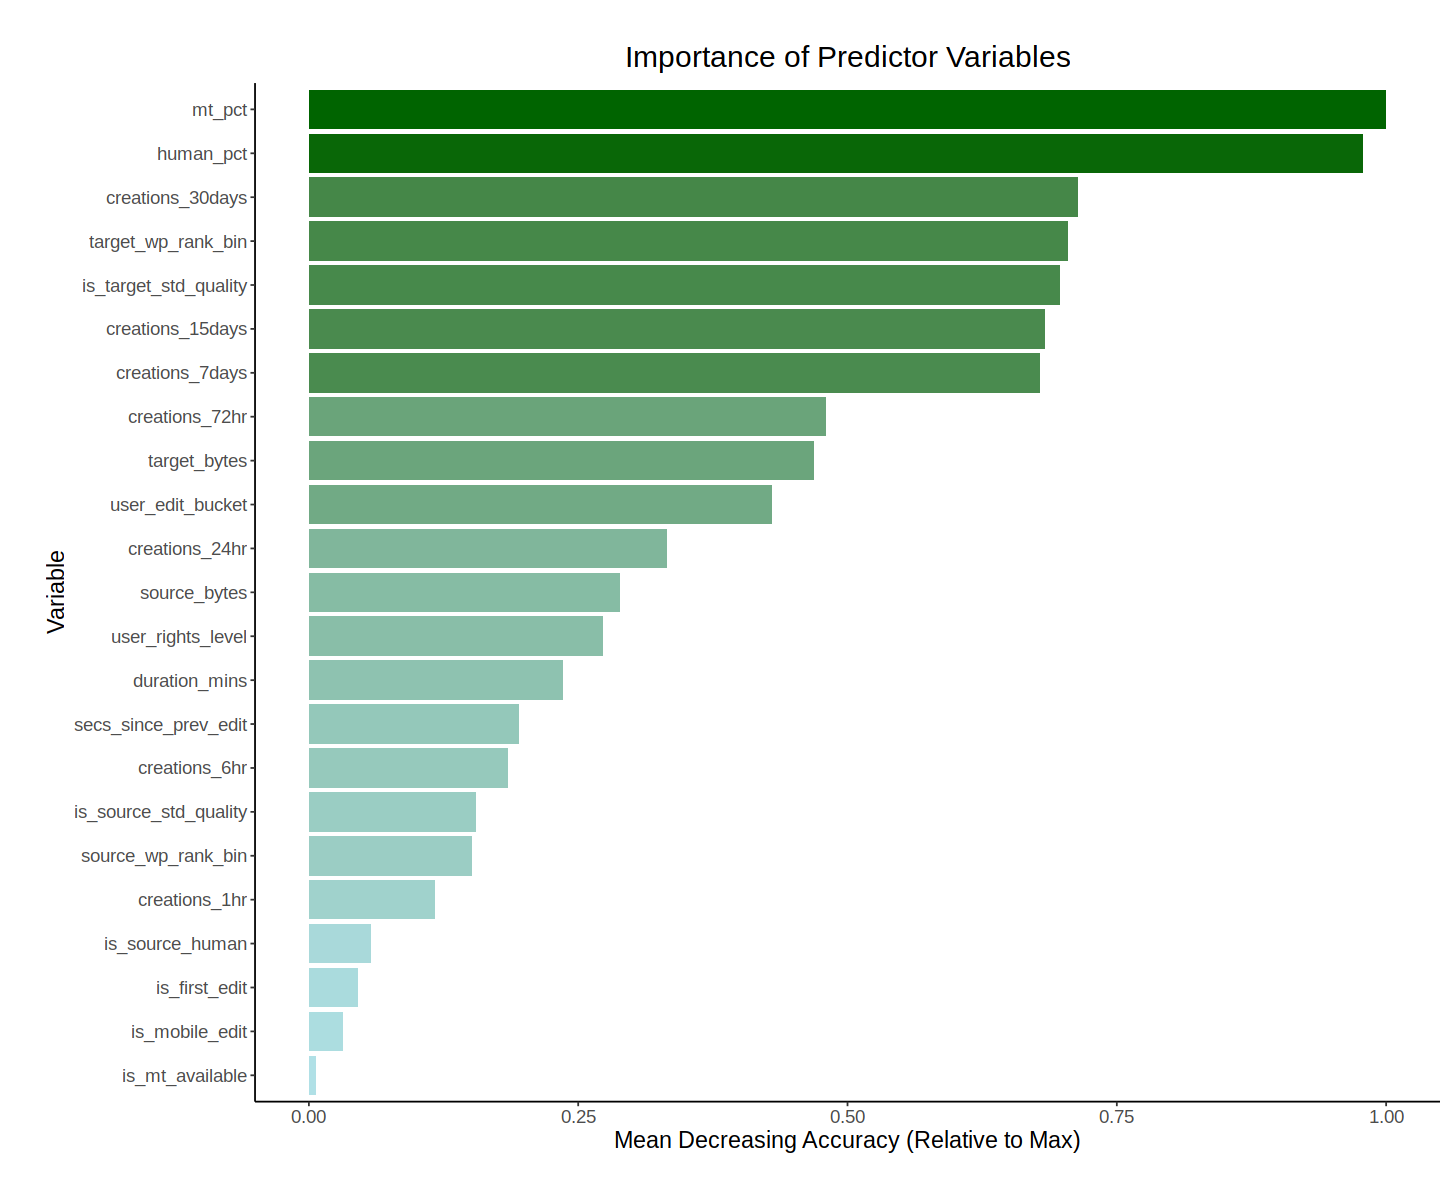

In [26]:
#| column: page-inset-left

options(repr.plot.width = 12, repr.plot.height = 10) 
var_imp_plot <- (
    ggplot(var_importance, aes(x = reorder(variable, imp_norm), y=imp_norm, fill=imp_norm)) + 
    geom_bar(stat = 'identity') +
    # geom_text(
    #     aes(label = sprintf("%.1f%%", imp_pct), fontface = 1),
    #     hjust = -0.1
    # ) + 
    coord_flip() + 
    labs(
        title = 'Importance of Predictor Variables',
        x = 'Variable',
        y = 'Mean Decreasing Accuracy (Relative to Max)'
    ) + 
    theme_classic() + 
    theme(
        plot.margin = unit(c(1, 0, 1, 1), "cm"),
        text = element_text(size=14),
        plot.title = element_text(hjust = 0.5, size=18),
        legend.position = 'none'
    ) + 
    scale_fill_gradient(low = 'PowderBlue', high = 'DarkGreen')
)

var_imp_plot

:::{.callout-note collapse=false}

## Interpretation & Summary

Each bar indicates the average decrease in accuracy (relative to maximum). The highest decrease in accuracy was observed when values of machine translation percentage were changed. This was followed human modified percetange, target Wikipedia size rank bin, number of articles translated by a user during the preceeding 15 and 30 days, and whether the translated article met standard quality criteria or not.  

Among the least important variables are (i.e. decrease in accuracy when changed is not comparatively large) are: availability of machine translation service for a given language pair, whether edit was a mobile edit or a first edit, whether the source article was a human subject, number of articles translated by a user during the preceeding 1 hour, and the source Wikipedia size rank bin.^[**Note:** This doesn't necessarily mean that these variables don't have any importance in deciding the deletion outcome, but when considering the overall set of variables available, they are less important compared to others.]

During the next step, where regression analysis will be used to estimate the impact of each of these variables on the outcome, the following variables will be excluded: `is_mt_available`, `is_mobile_edit`, `creations_1hr` and `source_wp_rank_bin`. Although `is_first_edit` and `is_source_human` have low importance, they will be included given the interest of understanding how these variables will influece the deletion outcome, within the scope of this analysis.

:::

### For first-time editors

Using the same approach as above, let us try to understand the variable importance for variables specific to first-time editors. Variables that are not relevant to first-time editors, such as translation during the preceeding time frame, edit bucket etc. will be dropped.

In [27]:
# create training dataset (85% of the dataset)

model_data_rf_edit1 <- select(filter(cx, is_first_edit == TRUE), 
                              -c(target_rev_id, secs_since_prev_edit, creations_1hr, 
                                 creations_6hr, creations_24hr, creations_72hr, 
                                 creations_7days, creations_15days, creations_30days, 
                                 user_edit_bucket, is_first_edit, user_rights_level))

trn_index_rf_edit1 <- createDataPartition(model_data_rf_edit1$is_page_deleted, p = 0.85, list = FALSE)
trn_data_rf_edit1 <- model_data_rf_edit1[trn_index_rf_edit1, ]
test_data_rf_edit1 <- model_data_rf_edit1[-trn_index_rf_edit1, ]

In [28]:
#| output: true
#| panel: input

tic()

rf_model_ranger_edit1 <- ranger(
    
    formula = is_page_deleted ~ ., 
    data = trn_data_rf_edit1, 
    num.trees = 501,
    
    # default for classification
    mtry = floor(sqrt(ncol(trn_data_rf_edit1))),
    verbose = TRUE,

    # mean decreasing accuracy
    importance = 'permutation',
    
    # ranger by default uses all available cores at disposal
    # ideal to specify threads, especially if on a shared server
    num.threads = 6
)

print('random forest model for newcomers built.')
toc()

saveRDS(rf_model_ranger_edit1, file='secrets/rf_model_edit1.rds')

[1] "random forest model for newcomers built."
1.584 sec elapsed


In [29]:
var_importance_edit1 <- data.frame(
    variable = names(rf_model_ranger_edit1$variable.importance),
    imp = rf_model_ranger_edit1$variable.importance
)

var_importance_edit1 <- var_importance_edit1 %>% mutate(
    # imp_pct = imp / sum(imp) * 100,
    imp_norm = imp / max(imp)
)

row.names(var_importance_edit1) <- NULL

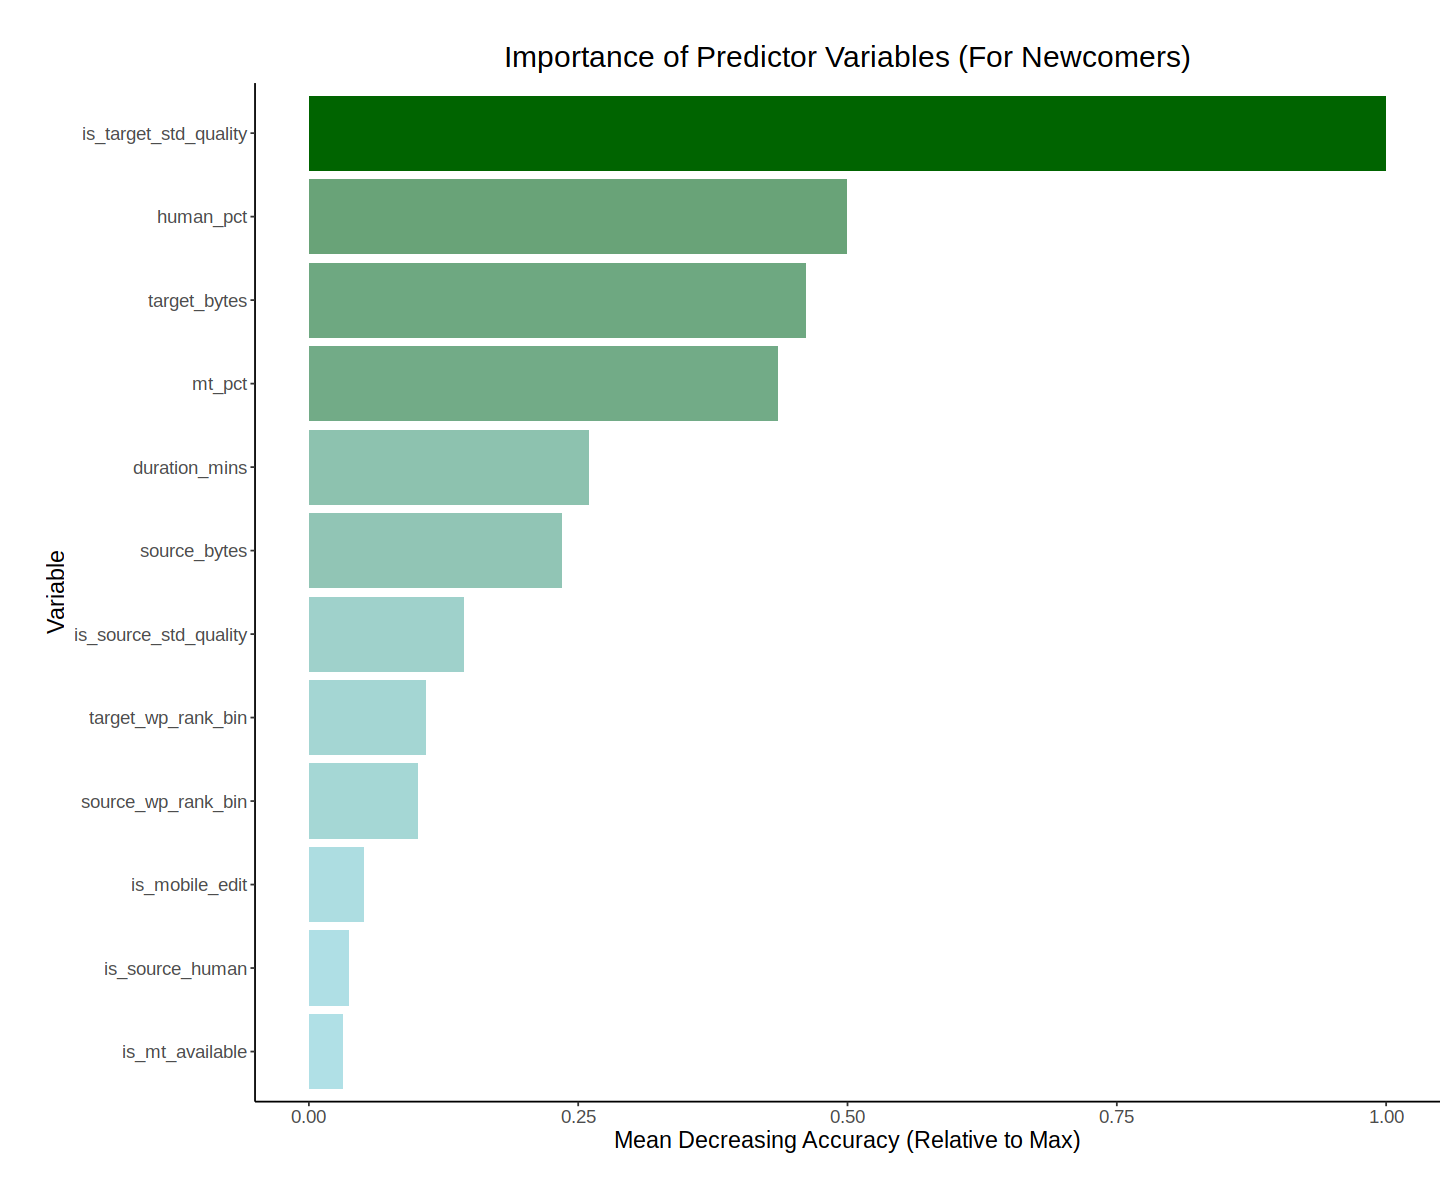

In [30]:
#| column: page-inset-left

options(repr.plot.width = 12, repr.plot.height = 10) 
var_imp_plot_edit1 <- (
    ggplot(var_importance_edit1, aes(x = reorder(variable, imp_norm), y=imp_norm, fill=imp_norm)) + 
    geom_bar(stat = 'identity') +
    coord_flip() + 
    labs(
        title = 'Importance of Predictor Variables (For Newcomers)',
        x = 'Variable',
        y = 'Mean Decreasing Accuracy (Relative to Max)'
    ) + 
    theme_classic() + 
    theme(
        plot.margin = unit(c(1, 0, 1, 1), "cm"),
        text = element_text(size=14),
        plot.title = element_text(hjust = 0.5, size=18),
        legend.position = 'none'
    ) + 
    scale_fill_gradient(low = 'PowderBlue', high = 'DarkGreen')    
)

var_imp_plot_edit1

:::{.callout-note collapse=false}

## Summary

For first-time editors, whether the target article meets the standard quality criteria or not, has the highest importance, followed by the human modification percentage, the target article size, the machine translation percentage and the time taken to translate (in minutes). 

Comparatively, the least important variables are availability of machine translation service for a given language pair, whether edit was a mobile edit or a first edit, whether the source article was a human subject, the source & target Wikipedias size rank bin. While most of the these are similar, notable exceptions are: target Wikipedia size, which was one of the most important variables when all users were considered.

For further regression analysis specific to newcomers, the following variables will be excluded: `is_mt_available`, `is_mobile_edit`, `source_wp_rank_bin` & `target_wp_rank_bin`. Although `is_source_human` has low importance, it will be included given the interest in the variable within the scope of this analysis.

:::

## Modelling

### All users

:::{.callout-tip icon=false collapse=false appearance=simple}

## Hiearchial logistic regression

As observed in the exploratatory data analysis, the data has class imbalance. The incidence of outcome (i.e. is_page_deleted) is not consistent across Wikipedias, and there is variation based on Wikipedias' comparative size. Even though lot of articles were created on smaller Wikipedias using CX, the deletion rate had been substantially lower. The low incidence might be due to factors beyond variables available and likely due to reasons such as lower patrollin + deletion activity, and variations in expectation of quality standards.

To start with, a logistic regression model is good for this case we want to predict a binary outcome, i.e. whether a page was deleted or not. However, to address this class imbalance, a hiearchial logistic regression (also known as [mixed effects model](https://en.wikipedia.org/wiki/Mixed_model)) will be a better choice to handle random effects, in this case, target Wikipedia size rank bin. It helps us to understand the variation in baseline probability for each grouped bin of the target language Wikipedia.

:::

In [33]:
#| output: true
#| panel: input

glmm_exclude_cols <- c('target_rev_id', 'is_mt_available', 'is_mobile_edit', 'source_wp_rank_bin', 'creations_1hr')

glmm_all_data <- select(cx, -all_of(glmm_exclude_cols))
glmm_numeric_cols <- names(select(glmm_all_data, where(is.numeric)))
glmm_all_data <- glmm_all_data %>% mutate(across(glmm_numeric_cols, log1p))

outcome <- 'is_page_deleted'
random_effect <- 'target_wp_rank_bin'
fixed_effects <- setdiff(names(glmm_all_data), c(outcome, random_effect ))

glmm_training_idx <- createDataPartition(glmm_all_data[[outcome]], p=0.8, list = FALSE)
glmm_training_data <- glmm_all_data[glmm_training_idx, ]
glmm_test_data <- glmm_all_data[-glmm_training_idx, ]

glmm_formula <- as.formula(glue('{outcome} ~ {paste(fixed_effects, collapse = \' + \')} + (1 | {random_effect})'))

tic()
blas_set_num_threads(16)
glmm_primary <- glmer(glmm_formula, family = binomial(link = 'logit'), data = glmm_training_data)
blas_set_num_threads(1)
print('model has been built.')
toc()

[1] "model has been built."
1312.168 sec elapsed


In [58]:
glmm_logical_cols <- setdiff(names(select(glmm_all_data, where(is.logical))), outcome)
glmm_factor_cols <- setdiff(names(select(glmm_all_data, where(is.factor))), random_effect)

glmm_numerical_features_summary_tbl <- tbl_regression(glmm_primary, include = glmm_numeric_cols)
glmm_logical_features_summary_tbl <- (
    tbl_regression(
        glmm_primary, 
        include = all_of(glmm_logical_cols), 
        show_single_row = all_of(glmm_logical_cols),
        label = list(
            is_source_std_quality = 'source meets standard quality',
            is_source_human = 'source is human',
            is_target_std_quality = 'target meets standard quality',
            is_first_edit = 'edit is user\'s first edit'
        )
    )
)
glmm_factor_features_summary_tbl <- tbl_regression(glmm_primary, include = all_of(glmm_factor_cols))

#### Model summary

In [59]:
#| column: page

display_tbl_hrz(
    list(
        as_raw_html(
            as_gt(
                glmm_numerical_features_summary_tbl
            ) %>% 
            opt_stylize(5) %>%
            tab_header('Numerical features')
            
        ), 
        as_raw_html(
            as_gt(
                glmm_logical_features_summary_tbl
            ) %>% 
            opt_stylize(5) %>%
            tab_header('Logical features')
        ), 
        as_raw_html(
            as_gt(
                glmm_factor_features_summary_tbl
            ) %>% 
            opt_stylize(5) %>%
            tab_header('Categorical features')
        )
    )
)

Shiny tags cannot be represented in plain text (need html)

#### Model interpretation

::: {.callout-tip appearance=simple icon=false}

Let us understand how logistic regression coefficients can be interpreted. The coefficients in the model summary are *log-odds* (logarithimic scale of odds, likelihood of an outcome). The probability of an outcome, given a change in variable is easier to interpret and communicate rather than *log-odds* (for example, how the deletion probability changes if the source article is human or if machine translation percentage is increased by 10%). An inverse logit function can be used to convert the *log-odds* of an outcome, into probability.

For interpretation, each variable will be compared to a baseline probability, which comes from the model's intercept. This is the probability of deletion if we set all predictors to zero. In other words, it can be thought of as probability of an article being deleted beyond what the current set of variables can explain. For a given variable, holding all other variables constant, the probability of deletion is calculated using the respective model coffiecient, and the difference between the baseline probability and the new probability is considered as the impact of the given variable on probability of deletion.

:::

::: {.callout-tip appearance=simple icon=false collapse=true}
## Mathematical representation

*P(X)* indicates probability of event X happening.
$$
\begin{align*}
& P(\text{deletion}) = \text{logit}^{-1} (\beta_0) \\
& P(\text{deletion} | \text{is\_source\_human}) = \text{logit}^{-1} (\beta_0 + \beta_1)
\end{align*}
$$
In the above equations:

* $\beta_0$ is the intercept
* $\beta_1$ is the model cofficient for `is_source_human`
* $P(\text{deletion})$ is the baseline probability of deletion
* $P(\text{deletion} | \text{is\_source\_human})$ is probability of deletion given source is human

$$
\begin{align*}
& \text{Percentage Change in Deletion Probability} = \\
& \frac{P(\text{deletion} | \text{is\_source\_human}) - P(\text{deletion})}{P(\text{deletion})} \times 100\%
\end{align*}
$$

:::

##### Random effect

In [38]:
glmm_ranefs <- ranef(glmm_primary)$target_wp_rank_bin
names(glmm_ranefs) <- c('Intercept')

glmm_fixefs <- data.frame(fixef(glmm_primary))
glmm_intercept <- glmm_fixefs['(Intercept)', ]

In [39]:
glmm_ranefs_summary <- (
    glmm_ranefs %>%
    mutate(
        adjusted_intercept = Intercept + glmm_intercept,
        baseline_prob = invlogit(glmm_intercept),
        ranef_prob = invlogit(adjusted_intercept),
        prob_diff = pct_diff(baseline_prob, ranef_prob)/100
    )
)

glmm_ranefs_summary$target_wp_bin <- row.names(glmm_ranefs_summary)

In [53]:
glmm_ranefs_summary_tbl <- (
    glmm_ranefs_summary %>%
    gt(rowname_col = 'target_wp_bin') %>%
    cols_hide(setdiff(colnames(glmm_ranefs_summary), c('target_wp_bin', 'prob_diff'))) %>%
    fmt_percent('prob_diff', decimals=0) %>%
    cols_label(prob_diff = '% Change') %>%
    tab_header('Change in Probability of Deletion', gt::html('<b>by Target Wikipedia Rank</b>')) %>%
    opt_stylize()
)

display_html(as_raw_html(glmm_ranefs_summary_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Change in Probability of Deletion 
 
 
 <td colspan="2" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center"> by Target Wikipedia Rank 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="% Change" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">% Change 
 
 
 
 <th id="stub_1_1" scope="row" class="gt_row gt_left gt_stub" style="border-style: none; padding-top: 8px; padding-bottom: 8px; margin: 10px; border-top-style: none; border-top-width: 1px; border-top-color: #89D3FE; border-left-style: none; border-left-width: 1px; border-left-color: #89D3FE; vertical-align: middle; overflow-x: hidden; color: #FFFFFF; background-color: #0076BA; font-size: 100%; font-weight: initial; text-transform: inherit; border-right-style: solid; border-right-width: 2px; border-right-color: #0076BA; padding-left: 5px; padding-right: 5px; text-align: left;" valign="middle" bgcolor="#0076BA" align="left">1-5 
<td headers="stub_1_1 prob_diff" class="gt_row gt_right" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; margin: 10px; border-top-style: none; border-top-width: 1px; border-top-color: #89D3FE; border-left-style: none; border-left-width: 1px; border-left-color: #89D3FE; border-right-style: none; border-right-width: 1px; border-right-color: #89D3FE; vertical-align: middle; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" valign="middle" align="right">23% 
 <th id="stub_1_2" scope="row" class="

:::{.callout-note collapse=false}

## Summary: target language Wikipedia size

We observed that the target language Wikipedia size rank influences the probability of deletion, beyond the quality of the translation itself. The above table explains how the probability of deletion varies by various Wikipedia sizes, irrespective of how good or bad the translation quality is.

* When the target language Wikipedia belongs to the top 20, the probability for deletion increases, with highest increase for top 11 to 20 Wikipedias.
* For the top 6 to 20 Wikipedias, the probability of deletion almost increases by 100% from the baseline (i.e. it gets doubled).
* For Wikipedias smaller than the the top 20, the probability of deletion decreases as compared to the baseline, and it decreases by 76% for Wikipedias smaller than the top 50.

This is consistent with the prior observations where the deletion proportion was substantially lower for smaller Wikipedias, despite having high CX usage. For further interpretation of other variables, the baseline probability for the top 11 to 20 Wikipedias will be considered as the new reference baseline, as the expectation of translation quality is likely the strictest of all groups.

:::

##### Logical features

In [54]:
glmm_signficance <- data.frame(p = summary(glmm_primary)$coefficients[, 'Pr(>|z|)'])
low_significance_vars <- c(row.names(glmm_signficance %>% filter(p >= 0.05)))

In [88]:
prob_impact <- function(
    var_name,
    var_info, 
    intercept, 
    fixefs, 
    ranefs, 
    ranef_group='11-20', 
    incl_ranef=TRUE, 
    return_pct_diff=TRUE
) {
      
    if (incl_ranef) {
        baseline <- intercept + ranefs[ranef_group, 'Intercept']
    } else {
        baseline <- intercept
    }

    coeff <- fixefs[var_name, ]

    if (var_info$var_type == 'num') {
        
        init_val <- var_info$init
        increase <- var_info$increase

        if (var_info$is_ln) {
            
            init_log_odds <- baseline + coeff * log1p(init_val)
            new_log_odds <- baseline + coeff * log1p(init_val + increase)
            
        } else {
            
            init_log_odds <- baseline + coeff * init_val
            new_log_odds <- baseline + coeff * (init_val + increase)
        }
        
    } else if (var_info$var_type == 'bool') {
        init_log_odds <- baseline
        new_log_odds <- baseline + coeff
    }

    init_val_prob <- invlogit(init_log_odds)
    increased_prob <- invlogit(new_log_odds)
    
    if (return_pct_diff) {
        return(pct_diff(init_val_prob, increased_prob))
    } else {
        return(new_prob)
    }
}

In [89]:
glmm_logical_features_summary <- data.frame(
    coeff = glmm_fixefs[glmm_logical_cols, ],
    feature = glmm_logical_cols
)
row.names(glmm_logical_features_summary) <- glmm_logical_cols

for (col in glmm_logical_cols) {
    glmm_logical_features_summary[col, 'prob_diff'] <- prob_impact(col, list(var_type = 'bool'), intercept = glmm_intercept, fixefs = glmm_fixefs, ranefs = glmm_ranefs) / 100
}

In [90]:
glmm_logical_features_summary_tbl <- (
    glmm_logical_features_summary %>%
    gt(rowname_col = 'feature') %>%
    fmt_percent('prob_diff', decimals=0) %>%    
    cols_label(
        coeff = 'Coefficient',
        prob_diff = '% Change'
    ) %>%
    tab_header('Change in Probability of Deletion', 'for logical variables') %>%
    tab_source_note('% Change is when the given feature is TRUE') %>%
    opt_stylize()
)

display_html(as_raw_html(glmm_logical_features_summary_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Change in Probability of Deletion 
 
 
 <td colspan="3" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center">for logical variables 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Coefficient" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Coefficient 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="% Change" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">% Change 
 
 
 
 <th id="stub_1_1" scope="row" class="gt_row gt_left gt_stub" style="border-style: none; padding-top: 8px; padding-bottom: 8px; margin: 10px; border-top-style: none; border-top-width: 1px; border-top-color: #89D3FE; border-left-style: none; border-left-width: 1px; border-left-color: #89D3FE; vertical-align: middle; overflow-x: hidden; color: #FFFFFF; background-color: #0076BA; font-size: 100%; font-weight: initial; text-transform: inherit; border-right-style: solid; border-right-width: 2px; border-right-color: #0076BA; padding-left: 5px; padding-right: 5px; text-align:

:::{.callout-note collapse=false}

## Summary: logical variables

* The impact on probability of deletion is highest when the target articles meets the standard quality criteria, where probability is decreased by 100%. During the exploratory data analysis, it was observed ~0% of the articles that are of standard quality were deleted.
* On the contrary, if the source articles meets standard quality, the probability of deletion increases by more than 60%. This might be counter intutive, and be associated with the article size, where the average size of the source article for articles that were deleted was higher. This indicates that when longer articles get translated the probability for deletion is likely to increase.
* If the translation is the user's first edit, the probability of deletion increases by 44%.
* If the source article is of a human subject, the probability of deletion increases by 7%.

:::

##### Numerical features

In [92]:
glmm_numerical_features_summary <- data.frame(
    feature = setdiff(glmm_numeric_cols, low_significance_vars),
    init_l1 = c(1000, 1000, 30, 10, 15, 300, 1, 5, 10),
    init_l2 = c(4000, 4000, 60, 25, 30, 600, 2, 15, 20),
    increase_l1 = c(2000, 2000, 15, 10, 30, 900, 1, 1, 1),
    increase_l2 = c(2000, 2000, 15, 10, 30, 900, 1, 1, 1)
)

row.names(glmm_numerical_features_summary) <- setdiff(glmm_numeric_cols, low_significance_vars)

for (col in glmm_numeric_cols) {
    row_index <- which(row.names(glmm_numerical_features_summary) == col)
    
    col_info <- list(
        var_type = 'num',
        is_ln = TRUE,
        init = glmm_numerical_features_summary[row_index, 'init_l1'], 
        increase = glmm_numerical_features_summary[row_index, 'increase_l1']        
    )
    
    glmm_numerical_features_summary[row_index, 'prob_diff_l1'] <- prob_impact(col, col_info, intercept = glmm_intercept, fixefs = glmm_fixefs, ranefs = glmm_ranefs) / 100

    col_info <- list(
        var_type = 'num',
        is_ln = TRUE,
        init = glmm_numerical_features_summary[row_index, 'init_l2'], 
        increase = glmm_numerical_features_summary[row_index, 'increase_l2']        
    )
    
    glmm_numerical_features_summary[row_index, 'prob_diff_l2'] <- prob_impact(col, col_info, intercept = glmm_intercept, fixefs = glmm_fixefs, ranefs = glmm_ranefs) / 100
}

In [94]:
glmm_numerical_features_summary_tbl <- (
    glmm_numerical_features_summary %>%
    gt(rowname_col = 'feature') %>%
    tab_spanner(
        label = 'Scenario 1',
        columns = ends_with('l1')
    ) %>%
    tab_spanner(
        label = 'Scenario 2',
        columns = ends_with('l2')
    ) %>%
    cols_label(
        starts_with("init") ~ "Initial",
        starts_with("increase") ~ "Increase",
        starts_with("prob") ~ "% Change"
    ) %>%
    fmt_percent(
        starts_with('prob')
    ) %>%
    data_color(
        starts_with('prob'),
        palette  = 'RdYlBu',
        reverse = TRUE
    ) %>%
    opt_stylize() %>%
    tab_header('Change in Probability of Deletion', 'for numerical variables') %>%
    tab_source_note(paste(paste(low_significance_vars, collapse = ', '), 'are excluded as coefficients are not statistically significant.'))
)

display_html(as_raw_html(glmm_numerical_features_summary_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Change in Probability of Deletion 
 
 
 <td colspan="7" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center">for numerical variables 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="2" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 
 Scenario 1 
 
 
 Scenario 2 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Initial" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Initial 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Increase" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Increase 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="% Change" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-v

:::{.callout-tip collapse=false}

## Interpretation

To the understand the table above (i.e. the impact of various numeric variables on the probability of deletion):

* The change in probability of deletion is calculated as the difference between probability for a given initial value and probability for the new value (initial + increase). This is because, realistically there is always some initial value to start with, rather than a zero.
    * For example, if we input 0 for size of the target article, the probability of deletion will decrease compared to having a value of 1000 bytes. But a target article of size zero, means there was no translation, and there is nothing to be deleted. Instead, we will understand how the probability changes if the size was increased by 2000 bytes, from an initial value of 1000 bytes.
* In the above table, two scenarios are listed, the first scenario has lower initial values, as compared the second. In the second scenario, the probabilities of deletion for same increase are lower compared to the first scenario. This is because, as mentioned above, the percentage change is compared to an initial probability, which would have already been higher for the second scenario.
    * For example, if a user has already translated 5 articles during the preceeding 15 days, translating another article increases the probability by 16%. But if the user has already translated 15 articles, the deletion probability will increase by 6% only.

:::

:::{.callout-note collapse=false}

## Brief summary

* The number of articles created during the preceeding 15 days has a significant impact on increasing the deletion probability.
* The increase in the following variables leads to increase in deletion probability: size of the source article, human modified percentage, time taken to translate, articles translated during the preceeding 6 hours and 15 days. Among those, the size of the source article and the number of articles translated during the preceeding 15 days have more influence compared to others.
* The increase in the following variables leads to decrease in deletion probability: size of the target article, machine translation percentage, seconds since previous edit, and number of articles translated during the preceeding 30 days.

:::

##### Categorical features

:::{.callout-tip icon=false collapse=false appearance=simple}

## User edit bucket and rights level

The model summary suggests that, overall as user experience increases, the probability of deletion decreases^[user_edit_bucket.L = -1.8:  explains the linear relationship, however, the presence of higher polynomical contrasts (quadratic, cubic and quartic) inidicates a more complex relation, rather than a simple linear one.]. In addition, the summary also suggests a more complex relation. It is easier to interpret that by visualizing. To do that, we will vary the user edit bucket, holding other variables constant, and plot the transformed predictions from the regression model that has been built. The same approach will be used for user rights levels as well.

:::

In [95]:
ue_predict_input <- data.frame(
    t(data.frame(
        x = sapply(glmm_all_data, function(x) if(is.numeric(x)) mean(x) else NA))))

row.names(ue_predict_input) <- NULL

ue_predict_input <- (
    select(ue_predict_input, -c('is_page_deleted')) %>%
    mutate(
        is_source_std_quality = TRUE,
        is_target_std_quality = FALSE,
        target_wp_rank_bin = '11-20',
        is_first_edit = FALSE,
        user_rights_level = 'confirmed',
        is_source_human = TRUE,
        across(glmm_numeric_cols, log1p)
    )
)

ue_predict_input <- ue_predict_input[rep(1, 5), ]
ue_predict_input['user_edit_bucket'] <- sort(unique(cx$user_edit_bucket))

categorical_vars <- c('target_wp_rank_bin', 'user_rights_level', 'user_edit_bucket')
ue_predict_input[categorical_vars] <- lapply(categorical_vars, function(var_name) {
  factor(ue_predict_input[[var_name]], levels = levels(glmm_all_data[[var_name]]))
})

ue_predictions <- select(ue_predict_input, c('user_edit_bucket'))
ue_predictions$prediction <- predict(glmm_primary, ue_predict_input)

In [96]:
ue_prob_plot <- (
    ggplot(
        ue_predictions, 
        aes(x = user_edit_bucket, y = invlogit(prediction), group=1)
    ) + 
    geom_point() +
    geom_line(color = 'blue') +
    theme_classic() + 
    labs(
        title = 'by User Edit Bucket',
        x = 'Edit Bucket',
        y = 'Probability of Deletion'
    ) +
    theme(
        plot.margin = unit(c(1, 0, 1, 1), "cm"),
        text = element_text(size=14),
        plot.title = element_text(hjust = 0.5, size=18),
        legend.position = 'none'
    ) + 
    scale_y_continuous(labels = scales::percent)
)

In [97]:
ur_predict_input <- data.frame(
    t(data.frame(
        x = sapply(glmm_all_data, function(x) if(is.numeric(x)) mean(x) else NA))))

row.names(ur_predict_input) <- NULL

ur_predict_input <- (
    select(ur_predict_input, -c('is_page_deleted')) %>%
    mutate(
        is_source_std_quality = TRUE,
        is_target_std_quality = FALSE,
        target_wp_rank_bin = '11-20',
        is_first_edit = FALSE,
        is_source_human = TRUE,
        across(glmm_numeric_cols, log1p)
    )
)

ur_predict_input <- ur_predict_input[rep(1, 3), ]
ur_predict_input['user_edit_bucket'] <- c('11-99', '100-999', '5000+')
ur_predict_input['user_rights_level'] <- c('none', 'confirmed', 'extended')

categorical_vars <- c('target_wp_rank_bin', 'user_rights_level', 'user_edit_bucket')
ur_predict_input[categorical_vars] <- lapply(categorical_vars, function(var_name) {
  factor(ur_predict_input[[var_name]], levels = levels(glmm_all_data[[var_name]]))
})

ur_predictions <- select(ur_predict_input, c('user_rights_level'))
ur_predictions$prediction <- predict(glmm_primary, ur_predict_input)

In [98]:
ur_prob_plot <- (
    ggplot(
        ur_predictions, 
        aes(x = user_rights_level, y = invlogit(prediction), group=1)
    ) + 
    geom_point() +
    geom_line(color = 'blue') +
    theme_classic() + 
    labs(
        title = 'by User Rights Level',
        x = 'User Rights Level',
        y = 'Probability of Deletion'
    ) +
    theme(
        plot.margin = unit(c(1, 0, 1, 1), "cm"),
        text = element_text(size=14),
        plot.title = element_text(hjust = 0.5, size=18),
        plot.subtitle = element_text(hjust = 0.5, size=16),
        legend.position = 'none'
    )
    + scale_y_continuous(labels = scales::percent)
)

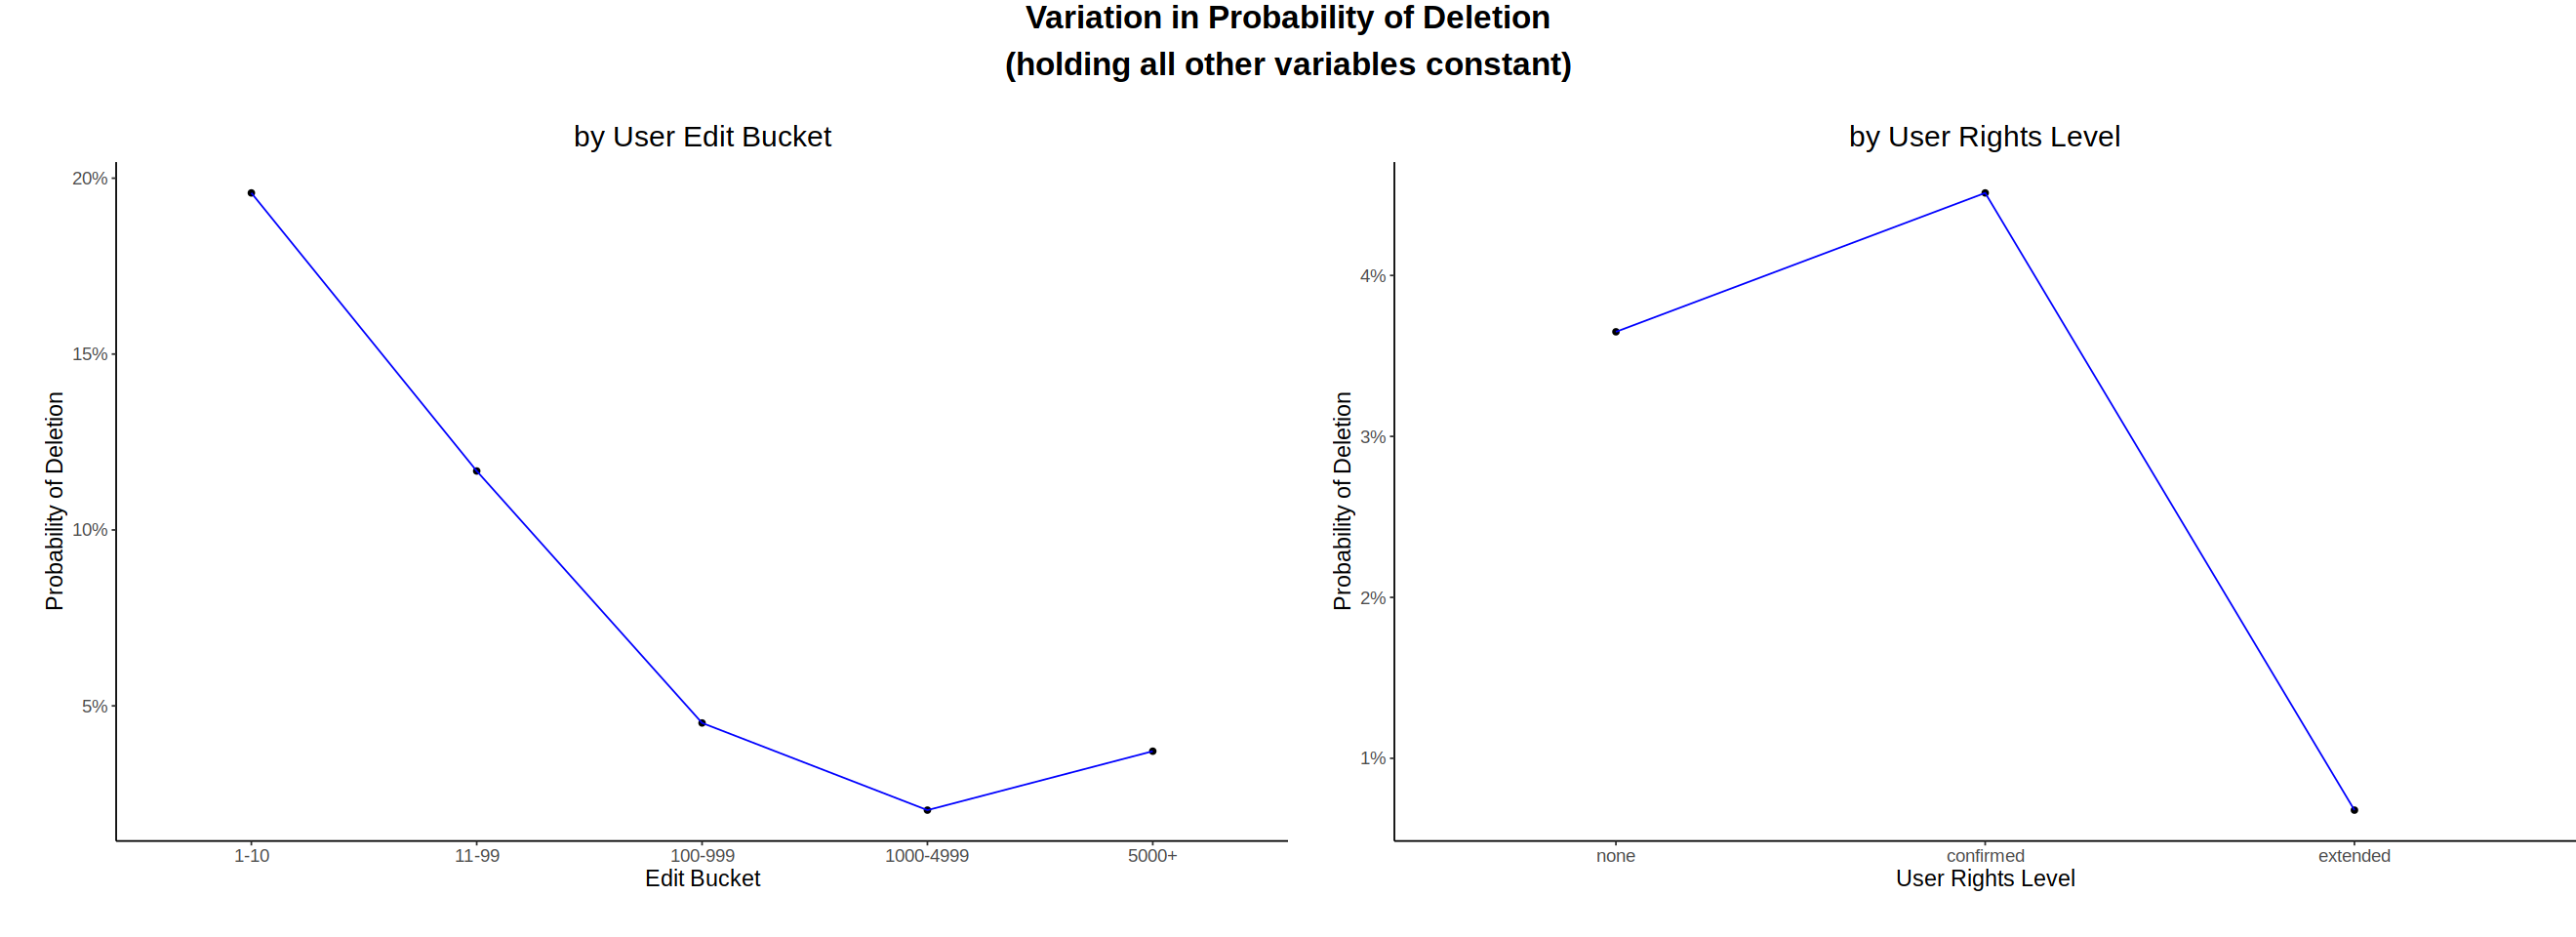

In [104]:
#| column: page

options(repr.plot.width = 22, repr.plot.height = 8)
grid.arrange(
    ue_prob_plot, 
    ur_prob_plot,
    ncol = 2, 
    nrow = 1,
    top = textGrob(
        'Variation in Probability of Deletion\n(holding all other variables constant)',
        gp = gpar(fontsize = 20, fontface = 'bold')
    )
)

:::{.callout-note collapse=false}

## Summary

* Although the probability of deletion decreases as user experience increases, the probability of deletion slightly increases if a user belongs to 5000+ edit bucket. A similar trend was observed during exploratory data anlysis, where the the proportion of deletion for users with 5000+ edits was higher. It is worth noting that users having more 5000+ edits also created the most number of articles. We will investigate a possible reason for why this might be happening, further.
* The probability of deletion is negligible if the user a extended user rights. However, t e analysis uses very broad levels, which may not be very useful for interpretation. Further analysis can explore the variation by using more levels. Having said that, user rights levels and naming is inconsistent across wikis, and user edit bucket is a better proxy for user experience.

:::

In [128]:
ue_creations_summary <- data.frame(
    cx %>% 
    group_by(user_edit_bucket) %>% 
    summarize(across(c('creations_30days', 'creations_15days', 'creations_7days', 'creations_72hr', 'creations_24hr', 'creations_6hr'), mean))
)

names(ue_creations_summary) <- c('user_edit_bucket', '30 days', '15 days', '7 days', '72 hours', '24 hours', '6 hours')

ue_creations_summary_tbl <- (
    ue_creations_summary %>%
    gt(rowname_col = 'user_edit_bucket') %>%
    fmt_number(decimals=0) %>% 
    data_color(palette = 'Blues') %>%
    tab_header(
        html('Average Number of Articles Translated<br>by User Edit Bucket'), 
        'during the preceeding time frame'
    )
)

display_html(as_raw_html(ue_creations_summary_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Average Number of Articles Translated by User Edit Bucket 
 
 
 <td colspan="7" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; font-weight: normal;" bgcolor="#FFFFFF" align="center">during the preceeding time frame 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="30 days" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">30 days 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="15 days" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">15 days 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="7 days" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-nu

:::{.callout-note collapse=false}

## Summary

As observed above, the articles transated by users with 5000+ edits have a higher probability of deletion. This is counter-intutive as one would expect it to be lower than that of users from other edit buckets. While there can be several other reasons, when we look at the number of articles translated during the preceeding 15 and 30 days, on average users with 5000+ edits have created more articles than any other edit bucket.^[The differences are statistically significant, please refer to @lst-wilcox in the appendix for more details.] A possible explanation could be that increased participantion in campaigns, where article creation is incentivized and more translations are created during a given timeframe than usual, it can lead to lower quality translations.

:::

### First-time editors

:::{.callout-tip icon=false collapse=false appearance=simple}

## Logistic regression

A target Wikipedia rank bin doesn't have high importance in understanding the deletion outcome for articles created by first-time editors, so a simple logistic regression model will be used to quantify the impact of various features on deletion outcome. Several features that are not releveant for users making their first edit, such as the number of creations during the preceeding timeframe, edit bucket etc. will be excluded.

:::

In [145]:
#| output: true
#| panel: input

edit1_glm_exclude_cols <- c('target_rev_id', 'secs_since_prev_edit', 'creations_1hr', 
                            'creations_6hr', 'creations_24hr', 'creations_72hr', 'creations_7days', 
                            'creations_15days', 'creations_30days', 'user_edit_bucket', 'is_first_edit', 
                            'user_rights_level', 'is_mt_available', 'is_mobile_edit', 'target_wp_rank_bin',
                            'source_wp_rank_bin') 

edit1_glm_data <- select(cx, -all_of(edit1_glm_exclude_cols))
edit1_glm_num_cols <- names(select(edit1_glm_data, where(is.numeric)))
edit1_glm_data <- edit1_glm_data %>% mutate(across(all_of(edit1_glm_num_cols), log1p))

edit1_glm_trn_idx <- createDataPartition(edit1_glm_data[[outcome]], p = 0.9, list = FALSE)
edit1_glm_trn_data <- edit1_glm_data[edit1_glm_trn_idx, ]
edit1_glm_tst_data <- edit1_glm_data[-edit1_glm_trn_idx, ]

edit1_predictors <- setdiff(names(edit1_glm_data), outcome)
edit1_glm_formula <- as.formula(glue('{outcome} ~ {paste(edit1_predictors, collapse = \' + \')}'))

tic()
blas_set_num_threads(16)
edit1_glm <- glm(
    formula = edit1_glm_formula,
    family = binomial(link = 'logit'),
    data = edit1_glm_trn_data
)
blas_set_num_threads(1)
print('model has been built.')
toc()

[1] "model has been built."
4.536 sec elapsed


#### Model summary

In [146]:
edit1_glm_numerical_features_summary_tbl <- tbl_regression(edit1_glm, include = all_of(edit1_glm_num_cols))

edit1_glm_logical_cols <- setdiff(names(select(edit1_glm_data, where(is.logical))), outcome)
edit1_glm_logical_features_summary_tbl <- (
    tbl_regression(
        edit1_glm, 
        include = all_of(edit1_glm_logical_cols), 
        show_single_row = all_of(edit1_glm_logical_cols),
        label = list(
            is_source_std_quality = 'source meets standard quality',
            is_source_human = 'source is human',
            is_target_std_quality = 'target meets standard quality'        
        ),
        tidy_fun = broom.helpers::tidy_parameters
    )
)

Profiled confidence intervals may take longer time to compute.
  Use `ci_method="wald"` for faster computation of CIs.



In [51]:
#| column: page

display_tbl_hrz(
    list(
        as_raw_html(
            as_gt(
                edit1_glm_numerical_features_summary_tbl
            ) %>% 
            opt_stylize(5) %>%
            tab_header('Numerical features')
            
        ), 
        as_raw_html(
            as_gt(
                edit1_glm_logical_features_summary_tbl
            ) %>% 
            opt_stylize(5) %>%
            tab_header('Logical features')
        )
    )
)

Shiny tags cannot be represented in plain text (need html)

#### Model interpretation

In [52]:
edit1_glm_coeffs <- data.frame(coeff = edit1_glm$coefficients)
edit1_glm_intercept <- edit1_glm_coeffs['(Intercept)', ]

##### Logical variables

In [53]:
edit1_glm_logical_features_summary <- data.frame(
    coeff = edit1_glm_coeffs[edit1_glm_logical_cols, ],
    feature = edit1_glm_logical_cols
)
row.names(edit1_glm_logical_features_summary) <- edit1_glm_logical_cols

for (col in edit1_glm_logical_cols) {
    edit1_glm_logical_features_summary[col, 'prob_diff'] <- prob_impact(
        col, list(var_type = 'bool'), intercept = edit1_glm_intercept, fixefs = edit1_glm_coeffs, incl_ranef = FALSE
    ) / 100
}

In [54]:
edit1_glm_logical_features_summary_tbl <- (
    edit1_glm_logical_features_summary %>%
    gt(rowname_col = 'feature') %>%
    fmt_percent('prob_diff', decimals=0) %>%    
    cols_label(
        coeff = 'Coefficient',
        prob_diff = '% Change'
    ) %>%
    tab_header('Change in Probability of Deletion', 'for logical variables') %>%
    tab_source_note('% Change is when the given feature is TRUE') %>%
    opt_stylize()
)

display_html(as_raw_html(edit1_glm_logical_features_summary_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Change in Probability of Deletion 
 
 
 <td colspan="3" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; font-weight: normal;" bgcolor="#FFFFFF" align="center">for logical variables 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Coefficient" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Coefficient 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="% Change" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">% Change 
 
 
 
 <th id="stub_1_1" scope="row" class="gt_row gt_left gt_stub" style="border-style: none; padding-top: 8px; padding-bottom: 8px; margin: 10px; border-top-style: solid; border-top-width: 1px; border-top-color: #D3D3D3; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; vertical-align: middle; overflow-x: hidden; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: initial; text-transform: inherit; border-right-style: solid; border-right-width: 2px; border-right-color: #D3D3D3; padding-left: 5px; padding-right: 5px; text-align

:::{.callout-note collapse=false}

## Summary

* Similar to the results we observed for all users, the impact on probability of deletion is highest when the target articles meets the standard quality criteria, where probability of deletion gets decreased by 100%. During the exploratory data analysis, it was observed none of the articles that met standard quality were deleted.
* On the contrary, if the source articles meets standard quality, the probability of deletion increases by more than 75% (as compared to 50% increase when all users were considered). This indicates that the probability of deletion is comparatively higher when first time edit editors translate longer articles.
* If the source article is of a human subject, the probability of deletion decreases by 17%, as compared to 7% increase when all users were considered.

:::

##### Numerical variables

In [55]:
edit1_glm_numerical_features_summary <- data.frame(
    feature = edit1_glm_num_cols,
    base_l1 = c(1000, 1000, 30, 10, 15),
    base_l2 = c(4000, 4000, 60, 25, 30),
    increase_l1 = c(2000, 2000, 15, 10, 30),
    increase_l2 = c(2000, 2000, 15, 10, 30)
)

row.names(edit1_glm_numerical_features_summary) <- edit1_glm_num_cols

for (col in edit1_glm_num_cols) {
    row_index <- which(row.names(edit1_glm_numerical_features_summary) == col)
    
    col_info <- list(
        var_type = 'num',
        is_ln = TRUE,
        base = edit1_glm_numerical_features_summary[row_index, 'base_l1'], 
        increase = edit1_glm_numerical_features_summary[row_index, 'increase_l1']        
    )
    
    edit1_glm_numerical_features_summary[row_index, 'prob_diff_l1'] <- prob_impact(col, col_info, intercept = edit1_glm_intercept, fixefs = edit1_glm_coeffs, incl_ranef = FALSE) / 100

    col_info <- list(
        var_type = 'num',
        is_ln = TRUE,
        base = edit1_glm_numerical_features_summary[row_index, 'base_l2'], 
        increase = edit1_glm_numerical_features_summary[row_index, 'increase_l2']        
    )
    
   edit1_glm_numerical_features_summary[row_index, 'prob_diff_l2'] <- prob_impact(col, col_info, intercept = edit1_glm_intercept, fixefs = edit1_glm_coeffs, incl_ranef = FALSE) / 100
}

In [56]:
edit1_glm_numerical_features_summary_tbl <- (
    edit1_glm_numerical_features_summary %>%
    gt(rowname_col = 'feature') %>%
    tab_spanner(
        label = 'Scenario 1',
        columns = ends_with('l1')
    ) %>%
    tab_spanner(
        label = 'Scenario 2',
        columns = ends_with('l2')
    ) %>%
    cols_label(
        starts_with("base") ~ "Initial",
        starts_with("increase") ~ "Increase",
        starts_with("prob") ~ "% Change"
    ) %>%
    fmt_percent(
        starts_with('prob')
    ) %>%
    data_color(
        starts_with('prob'),
        palette  = 'RdYlBu',
        reverse = TRUE
    ) %>%
    opt_stylize() %>%
    tab_header('Change in Probability of Deletion', 'for numerical variables')
)

display_html(as_raw_html(edit1_glm_numerical_features_summary_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 Change in Probability of Deletion 
 
 
 <td colspan="7" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 85%; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center">for numerical variables 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="2" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 
 Scenario 1 
 
 
 Scenario 2 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Initial" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Initial 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Increase" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Increase 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="% Change" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-v

:::{.callout-tip collapse=true}

## Interpretation

To the understand the table above (i.e. the impact of various numeric variables on the probability of deletion):

* The change in probability of deletion is calculated as the difference between probability for a given initial value and probability for the new value (initial + increase). This is because, realistically there is always some initial value to start with, rather than a zero.
    * For example, if we input 0 for size of the target article, the probability of deletion will decrease compared to having a value of 1000 bytes. But a target article of size zero, means there was no translation, and there is nothing to be deleted. Instead, we will understand how the probability changes if the size was increased by 2000 bytes, from an initial value of 1000 bytes.
* In the above table, two scenarios are listed, the first scenario has lower initial values, as compared the second. In the second scenario, the probabilities of deletion for same increase are lower compared to the first scenario. This is because, as mentioned above, the percentage change is compared to an initial probability, which would have already higher for the second scenario.

:::

:::{.callout-note collapse=false}
 
## Brief summary

* Increase in the following variables lead to increase in deletion probability: size of the source article, human modification percentage, and time taken to translate.
    * Among those, the size of the source article has the most influence.
* Increase in the following variables lead to decrease in deletion probability: size of the target article and machine translation percentage.

:::

## Conclusion

:::{.callout-note collapse=false}
 
Throughout the analysis, the focus has been on various factors affect the deletion outcome of articles created through the Content Translation tool, the goal is to inform improvements to machine translation limits system. The current system uses the percentages of unmodified (machine translated) content and human modified content to throttle/block translations. However, from both the exploratory data analysis and regression analysis, it was observed that articles that were not deleted had a higher percentage of machine translated content and increase in machine translated content is associated with decreased probability of deletion. This may be counter-intutive and contrary to the current understanding of how these percentages might affect the quality of the translated article. As machine translation alogrithms get more and more accurate with time, it might get even harder to estimate what is a good threshold. In the past, communities [have reported](https://phabricator.wikimedia.org/T252371) that the thresholds are sometimes too restrictive in a way that even good quality translations are blocked. While it is not practically sensible to allow 100% machine translated content, it is worth thinking about evolving the system beyond machine translated and human modified percentages. 

A key insight from the analysis is how the standard quality impacts the deletion rate. An article can be considered of standard quality, if it is at least 8kB long, has at least one category, has at least seven sections, is illustrated with at least one image, has at least four references and two intra wiki links. While it is not practical for all the translations to meet standard quality, it can be encouraged to the have the translation as close as possible to the standard quality. We also observed the increase in target article's size is associated with decrease in deletion probability. So even if all translations are not 8kB long, they can be encouraged to be expanded. In addition to the machine translation and human modification percentages, the criteria can be also be used to think about thresholds and checks. For example, throttle/block if there is not even one intra-wiki link or a reference. Similar to [Edit check](https://www.mediawiki.org/wiki/Edit_check), they can also be used to provide actionable feedback when a user is translating an article. 

In addition, increase in the time elapsed since users' previous edit is associated with decrease in probability of deletion. As of one of the goals was to understand how campaigns/contests impact the deletion rate, as users tend to create more content without much attention to the quality, we explored how the number of translations created during the preceeding time frame has an impact on the deletion outcome. Although different intervals were observed and among all of them, increase in the number of articles during the given preceeding time frame is associated with increase in deletion probability, the number of articles created during the preceeding 15 days has the highest impact. Most of the impact of shorter time frames is not significant.

To conclude, for the limits system to effectively counter (and provide feedback) for potentially low quality translations, other factors apart from machine translation and human modification percentages can be considered, mostly importantly the standard quality criteria. A follow-up analysis, if needed, can look into how each of the criteria for standard quality impacts the deletion outcome.

:::

## Appendix

**Average of numerical variables by various edit buckets**

In [87]:
#| label: tbl-num-features-avg-by-edit-bucket

display_html(as_raw_html(num_cols_mean_by_edit_bucket_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #004D80; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #004D80; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <td colspan="7" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 125%; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #0076BA; font-weight: normal;" bgcolor="#FFFFFF" align="center">Average of Numerical Features by Edit Buckets 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="source_bytes" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">source_bytes 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="target_bytes" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">target_bytes 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="secs_since_prev_edit" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="ri

**Variation in quatiles pre/post-winsorizing**

In [82]:
#| label: tbl-pre-post-winsz

display_html(as_raw_html(pre_post_quantiles_tbl))

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 3px; border-top-color: #D5D5D5; border-right-style: solid; border-right-width: 3px; border-right-color: #D5D5D5; border-bottom-style: solid; border-bottom-width: 3px; border-bottom-color: #D5D5D5; border-left-style: solid; border-left-width: 3px; border-left-color: #D5D5D5;" bgcolor="#FFFFFF">
 
 
 <td colspan="5" class="gt_heading gt_title gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 125%; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D5D5D5; font-weight: normal;" bgcolor="#FFFFFF" align="center">Variation in Quantiles Pre/Post Winsorizing 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="2" colspan="1" scope="col" id="Variable" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#004D80" valign="bottom" align="left">Variable 
 
 Mean (Average) 
 
 
 100% 
 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Pre" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#004D80" valign="bottom" align="right">Pre 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Post" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#004D80" valign="bottom" align="right">Post 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Pre" style="border-style: none; color: #FFFFFF; background-color: #004D80; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#004D80" valign="bottom" align

**Difference in articles created by 1000-4999 and 5000+ edit buckets**

*(during the preceeding 15 and 30 days)*

[Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) (also known as Wilcoxon rank-sum test) will be used to check if the difference between the means of the number of articles created by users belonging to 1000-4999 and 5000+ edit buckets is significant or not. The use of *Mann–Whitney U test* has been decided given the following: no assumption of the distribution, predictor variables are categorical, and the groups are mutually exclusive.

In [17]:
#| label: lst-wilcox

cx_1k <- subset(cx, user_edit_bucket == "1000-4999")
cx_5k <- subset(cx, user_edit_bucket == "5000+")

cx_30days_wilcox <- wilcox.test(cx_5k$creations_30days, cx_1k$creations_30days, exact = FALSE)
cx_15days_wilcox <- wilcox.test(cx_5k$creations_15days, cx_1k$creations_15days, exact = FALSE)

cat('articles translated during the prceeding 30 days')
print(cx_30days_wilcox)

cat()

cat('----------------------------------------------------\narticles translated during the prceeding 15 days')
print(cx_15days_wilcox)

articles translated during the prceeding 30 days
	Wilcoxon rank sum test with continuity correction

data:  cx_5k$creations_30days and cx_1k$creations_30days
W = 14078450030, p-value <0.0000000000000002
alternative hypothesis: true location shift is not equal to 0

----------------------------------------------------
articles translated during the prceeding 15 days
	Wilcoxon rank sum test with continuity correction

data:  cx_5k$creations_15days and cx_1k$creations_15days
W = 13715092348, p-value = 0.02
alternative hypothesis: true location shift is not equal to 0

